<a href="https://colab.research.google.com/github/gomescheelsy03/INST-414-0101-/blob/main/Is_Higher_Education_Worth_It_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Chelsy Gomes |
Instructor: Cody Buntain |
Course: INST414 (0101) |
Date: 09/24/2025|
Module 1 Assignment

In [1]:
# --- Setup & imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Make tables and numbers easier to read
pd.set_option("display.max_columns", 50)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")

# Matplotlib defaults (cleaner fonts and bigger figures)
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.dpi"] = 120

print("Ready: pandas", pd.__version__)


Ready: pandas 2.2.2


In [3]:
df = pd.read_csv("Employers_data.csv")

# Quick check
print("Shape:", df.shape)
df.head()


Shape: (10000, 10)


,Employee_ID,Name,Age,Gender,Department,Job_Title,Experience_Years,Education_Level,Location,Salary
0,1,Merle Ingram,24,Female,Engineering,Engineer,1,Master,Austin,90000
1,2,John Mayes,56,Male,Sales,Executive,33,Master,Seattle,195000
2,3,Carlos Wille,21,Male,Engineering,Intern,1,Bachelor,New York,35000
3,4,Michael Bryant,30,Male,Finance,Analyst,9,Bachelor,New York,75000
4,5,Paula Douglas,25,Female,HR,Analyst,2,Master,Seattle,70000


In [4]:
# --- Basic Exploration ---

# General info (column names, data types, non-null counts)
df.info()

# Summary statistics for numeric columns
df.describe()

# Count missing values in each column
print("\nMissing values per column:")
print(df.isna().sum())

# Quick look at unique values for key categorical columns
print("\nUnique values in Education_Level:", df["Education_Level"].unique())
print("Unique values in Department:", df["Department"].unique())
print("Unique values in Location:", df["Location"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Employee_ID       10000 non-null  int64 
 1   Name              10000 non-null  object
 2   Age               10000 non-null  int64 
 3   Gender            10000 non-null  object
 4   Department        10000 non-null  object
 5   Job_Title         10000 non-null  object
 6   Experience_Years  10000 non-null  int64 
 7   Education_Level   10000 non-null  object
 8   Location          10000 non-null  object
 9   Salary            10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB

Missing values per column:
Employee_ID         0
Name                0
Age                 0
Gender              0
Department          0
Job_Title           0
Experience_Years    0
Education_Level     0
Location            0
Salary              0
dtype: int64

Unique values in Education

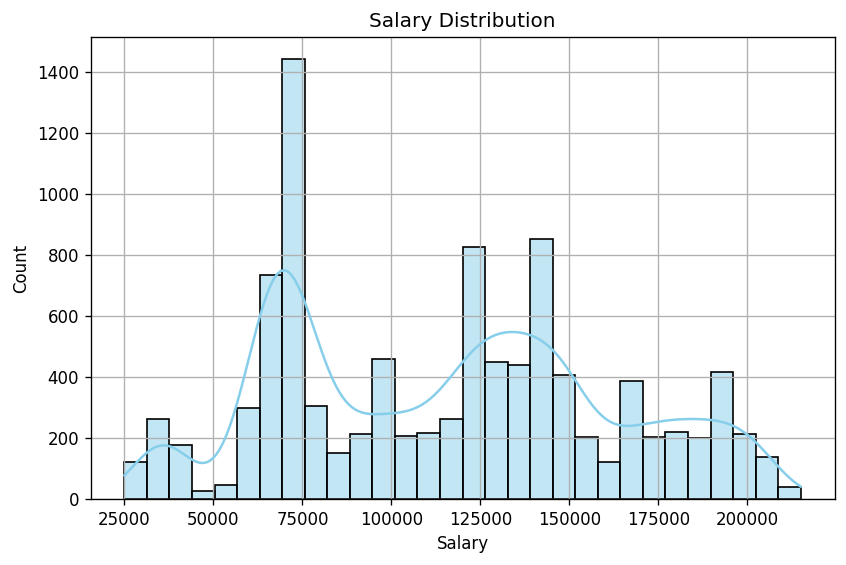

/tmp/ipython-input-3870095397.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Education_Level", y="Salary", data=df, estimator=np.mean, ci=None, palette="viridis")
/tmp/ipython-input-3870095397.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education_Level", y="Salary", data=df, estimator=np.mean, ci=None, palette="viridis")


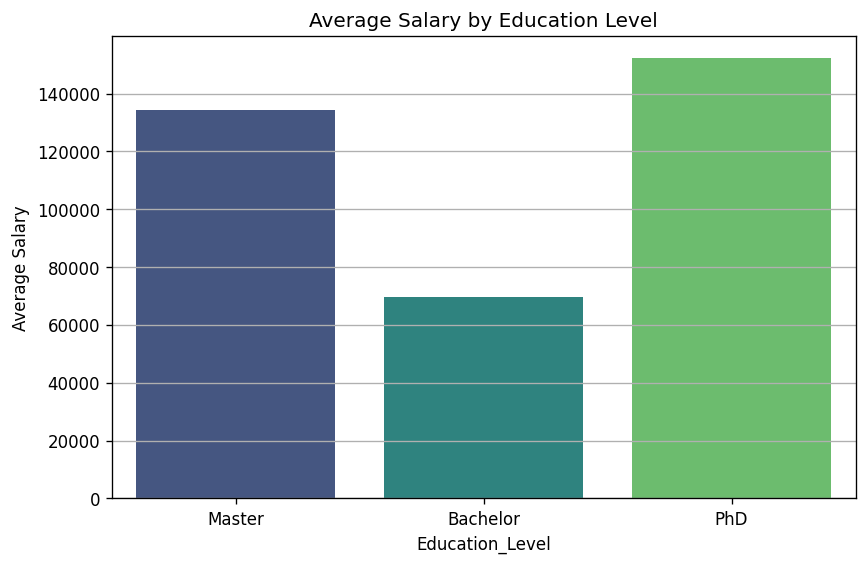

/tmp/ipython-input-3870095397.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Department", y="Salary", data=df, palette="Set2")


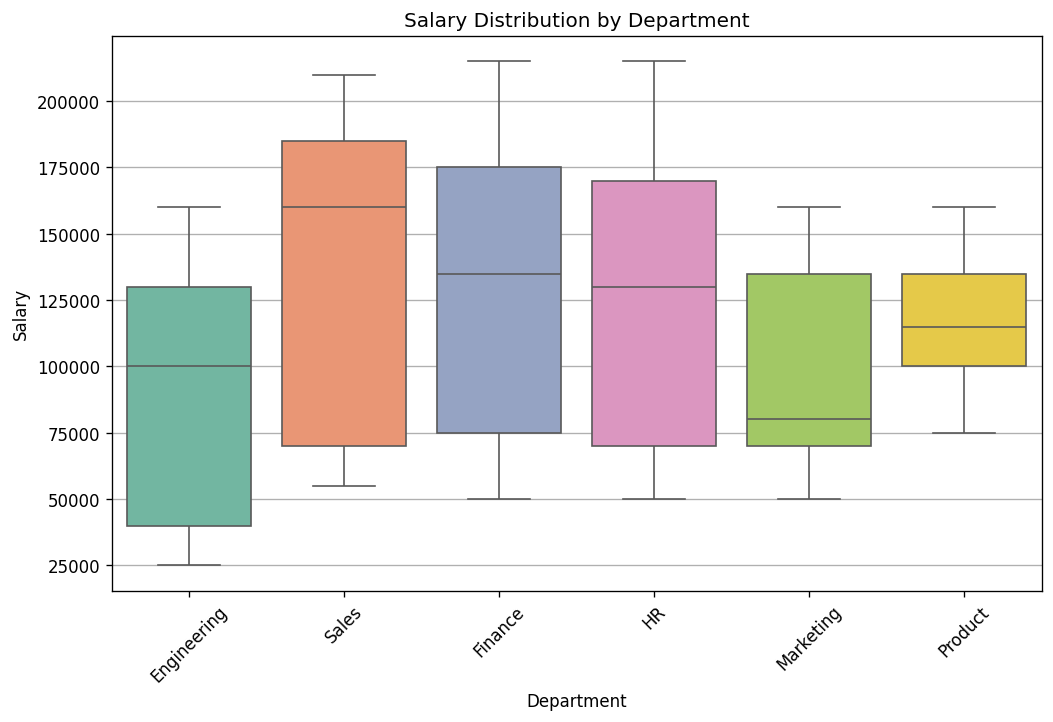

In [5]:
# --- Exploratory Data Analysis (Visuals) ---

import seaborn as sns

# 1. Salary distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Salary"], bins=30, kde=True, color="skyblue")
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

# 2. Average salary by education level
plt.figure(figsize=(8,5))
sns.barplot(x="Education_Level", y="Salary", data=df, estimator=np.mean, ci=None, palette="viridis")
plt.title("Average Salary by Education Level")
plt.ylabel("Average Salary")
plt.show()

# 3. Salary spread by department
plt.figure(figsize=(10,6))
sns.boxplot(x="Department", y="Salary", data=df, palette="Set2")
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()


In [10]:
# --- Salary summary by education level ---
summary_table = df.groupby("Education_Level")["Salary"].agg(["mean", "median", "min", "max", "count"]).round(2)
summary_table


,mean,median,min,max,count
Education_Level,,,,,
Bachelor,"69,529.72","70,000.00",25000,125000,3381
Master,"134,234.28","135,000.00",55000,215000,4930
PhD,"152,137.36","150,000.00",85000,210000,1689


In [7]:
# --- Average salary by Education Level within each Department ---
edu_dept_table = df.groupby(["Department", "Education_Level"])["Salary"].mean().round(2).unstack()
edu_dept_table


Education_Level,Bachelor,Master,PhD
Department,,,
Engineering,"54,933.81","125,238.46","126,534.65"
Finance,"69,667.52","144,540.30","165,232.20"
HR,"68,688.89","141,785.71","163,289.47"
Marketing,"69,079.37","118,685.78","133,341.58"
Product,"97,864.81","123,542.98","123,963.82"
Sales,"68,768.35","152,378.38","182,167.72"


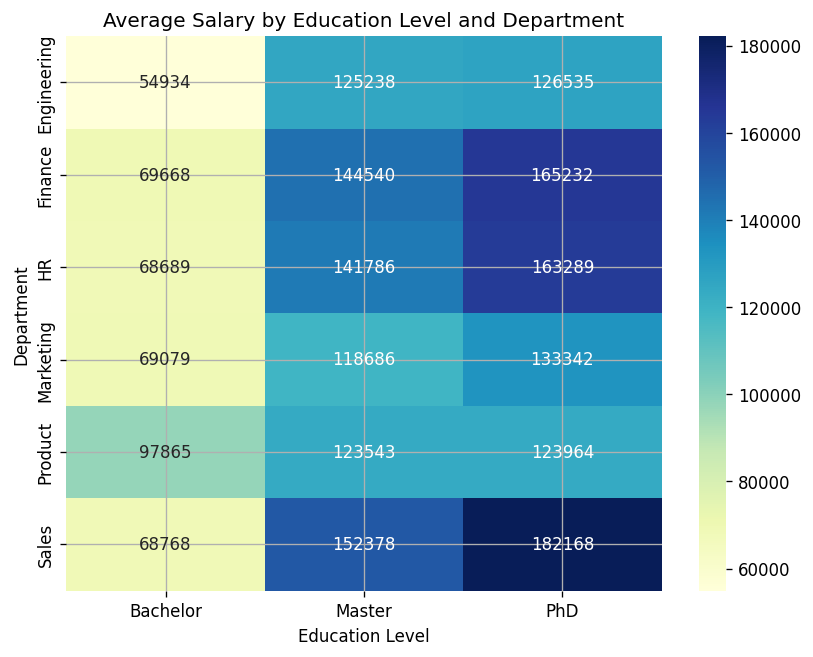

In [8]:
# --- Heatmap of Average Salary by Department & Education Level ---
plt.figure(figsize=(8,6))
sns.heatmap(edu_dept_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Salary by Education Level and Department")
plt.ylabel("Department")
plt.xlabel("Education Level")
plt.show()


In [9]:
# --- Cleaning & Validation ---

# 1. Check for duplicate rows
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

# 2. Check salary range (no negative salaries, reasonable upper bound)
print("Min salary:", df["Salary"].min())
print("Max salary:", df["Salary"].max())

# 3. Validate age and experience
print("Min age:", df["Age"].min(), "Max age:", df["Age"].max())
print("Min years experience:", df["Experience_Years"].min(),
      "Max years experience:", df["Experience_Years"].max())

# Sanity check: experience should not exceed (age - 16)
invalid_exp = df[df["Experience_Years"] > (df["Age"] - 16)]
print("Records with impossible experience values:", len(invalid_exp))

# 4. Check categorical columns for consistency
for col in ["Education_Level", "Department", "Location"]:
    print(f"\nUnique values in {col}:", df[col].unique())


Duplicate rows: 0
Min salary: 25000
Max salary: 215000
Min age: 21 Max age: 60
Min years experience: 0 Max years experience: 37
Records with impossible experience values: 0

Unique values in Education_Level: ['Master' 'Bachelor' 'PhD']

Unique values in Department: ['Engineering' 'Sales' 'Finance' 'HR' 'Marketing' 'Product']

Unique values in Location: ['Austin' 'Seattle' 'New York' 'San Francisco' 'Chicago']
